In [1]:
import pandas as pd

# Specify the file path to your CSV file
file_path = 'E:/Professional/AI/Anti Money Laundering/ML.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)


In [2]:
print(df.head())

  typeofaction  sourceid  destinationid  amountofmoney                 date  \
0      cash-in     30105          28942         494528  2019-07-19 14:40:00   
1      cash-in     30105           8692         494528  2019-05-17 14:57:00   
2      cash-in     30105          60094         494528  2019-07-20 13:20:00   
3      cash-in     30105          20575         494528  2019-07-03 14:15:00   
4      cash-in     30105          45938         494528  2019-05-26 10:40:00   

   isfraud typeoffraud  
0        1       type1  
1        1       type1  
2        1       type1  
3        1       type1  
4        1       type1  


In [3]:
df.head()

,typeofaction,sourceid,destinationid,amountofmoney,date,isfraud,typeoffraud
0,cash-in,30105,28942,494528,2019-07-19 14:40:00,1,type1
1,cash-in,30105,8692,494528,2019-05-17 14:57:00,1,type1
2,cash-in,30105,60094,494528,2019-07-20 13:20:00,1,type1
3,cash-in,30105,20575,494528,2019-07-03 14:15:00,1,type1
4,cash-in,30105,45938,494528,2019-05-26 10:40:00,1,type1


In [7]:
# Compute basic statistics for the "amountofmoney" column
amount_stats = df['amountofmoney'].describe()

# Display the computed statistics
print(amount_stats)


count    2.340000e+03
mean     2.508583e+06
std      2.560434e+06
min      1.333200e+04
25%      3.359140e+05
50%      1.162354e+06
75%      4.686559e+06
max      7.952497e+06
Name: amountofmoney, dtype: float64


In [8]:
# Display column names and their data types
column_datatypes = df.dtypes
print(column_datatypes)


typeofaction     object
sourceid          int64
destinationid     int64
amountofmoney     int64
date             object
isfraud           int64
typeoffraud      object
dtype: object


In [9]:
# Display detailed information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   typeofaction   2340 non-null   object
 1   sourceid       2340 non-null   int64 
 2   destinationid  2340 non-null   int64 
 3   amountofmoney  2340 non-null   int64 
 4   date           2340 non-null   object
 5   isfraud        2340 non-null   int64 
 6   typeoffraud    2340 non-null   object
dtypes: int64(4), object(3)
memory usage: 128.1+ KB


In [10]:
# Compute basic statistics for the "amountofmoney" column
amount_stats = df['amountofmoney'].describe()

# Extract specific statistics
count = amount_stats['count']
mean = amount_stats['mean']
std = amount_stats['std']
min_value = amount_stats['min']
twenty_five_percentile = amount_stats['25%']
fifty_percentile = amount_stats['50%']  # median
seventy_five_percentile = amount_stats['75%']
max_value = amount_stats['max']

# Display the computed statistics
print(f"Count: {count}")
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")
print(f"Minimum: {min_value}")
print(f"25th Percentile: {twenty_five_percentile}")
print(f"Median (50th Percentile): {fifty_percentile}")
print(f"75th Percentile: {seventy_five_percentile}")
print(f"Maximum: {max_value}")


Count: 2340.0
Mean: 2508582.8914529914
Standard Deviation: 2560433.609988803
Minimum: 13332.0
25th Percentile: 335914.0
Median (50th Percentile): 1162353.5
75th Percentile: 4686559.25
Maximum: 7952497.0


In [11]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


typeofaction     0
sourceid         0
destinationid    0
amountofmoney    0
date             0
isfraud          0
typeoffraud      0
dtype: int64


In [12]:
# Explore the distribution of 'typeofaction'
typeofaction_distribution = df['typeofaction'].value_counts()
print("Distribution of typeofaction:")
print(typeofaction_distribution)
print()

# Explore the distribution of 'sourceid'
sourceid_distribution = df['sourceid'].value_counts()
print("Distribution of sourceid:")
print(sourceid_distribution)
print()

# Explore the distribution of 'destinationid'
destinationid_distribution = df['destinationid'].value_counts()
print("Distribution of destinationid:")
print(destinationid_distribution)
print()

# Explore the distribution of 'typeoffraud'
typeoffraud_distribution = df['typeoffraud'].value_counts()
print("Distribution of typeoffraud:")
print(typeoffraud_distribution)


Distribution of typeofaction:
transfer    1580
cash-in      760
Name: typeofaction, dtype: int64

Distribution of sourceid:
4161     30
39284    29
96057    26
82688    26
92735    25
         ..
25847     1
55321     1
51984     1
45257     1
26390     1
Name: sourceid, Length: 1749, dtype: int64

Distribution of destinationid:
95498    29
83790    29
42168    28
86903    27
43793    26
         ..
59772     1
2349      1
65175     1
31610     1
23866     1
Name: destinationid, Length: 1710, dtype: int64

Distribution of typeoffraud:
none     941
type3    511
type2    465
type1    423
Name: typeoffraud, dtype: int64


In [13]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Display the distribution of transactions over time
transactions_per_year = df['year'].value_counts().sort_index()
transactions_per_month = df['month'].value_counts().sort_index()
transactions_per_day = df['day'].value_counts().sort_index()

print("Transactions per Year:")
print(transactions_per_year)
print()

print("Transactions per Month:")
print(transactions_per_month)
print()

print("Transactions per Day:")
print(transactions_per_day)


Transactions per Year:
2019    2340
Name: year, dtype: int64

Transactions per Month:
2    127
3    470
4    473
5    499
6    457
7    314
Name: month, dtype: int64

Transactions per Day:
1     85
2     80
3     74
4     67
5     90
6     85
7     67
8     88
9     75
10    78
11    85
12    87
13    80
14    64
15    90
16    74
17    83
18    73
19    89
20    79
21    72
22    76
23    75
24    54
25    81
26    92
27    64
28    74
29    58
30    68
31    33
Name: day, dtype: int64


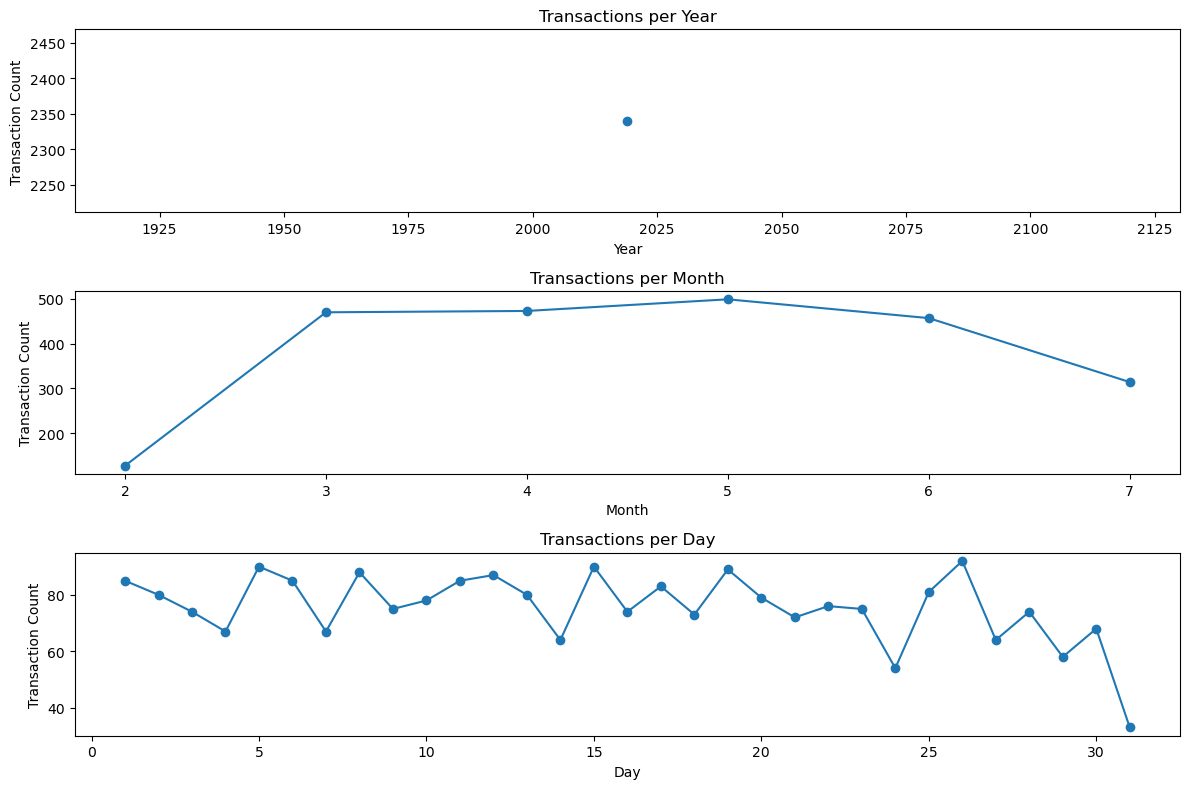

In [14]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Plot transactions over time
plt.figure(figsize=(12, 8))

# Transactions per Year
plt.subplot(3, 1, 1)
plt.plot(df['year'].value_counts().sort_index(), marker='o')
plt.title('Transactions per Year')
plt.xlabel('Year')
plt.ylabel('Transaction Count')

# Transactions per Month
plt.subplot(3, 1, 2)
plt.plot(df['month'].value_counts().sort_index(), marker='o')
plt.title('Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Transaction Count')

# Transactions per Day
plt.subplot(3, 1, 3)
plt.plot(df['day'].value_counts().sort_index(), marker='o')
plt.title('Transactions per Day')
plt.xlabel('Day')
plt.ylabel('Transaction Count')

plt.tight_layout()
plt.show()


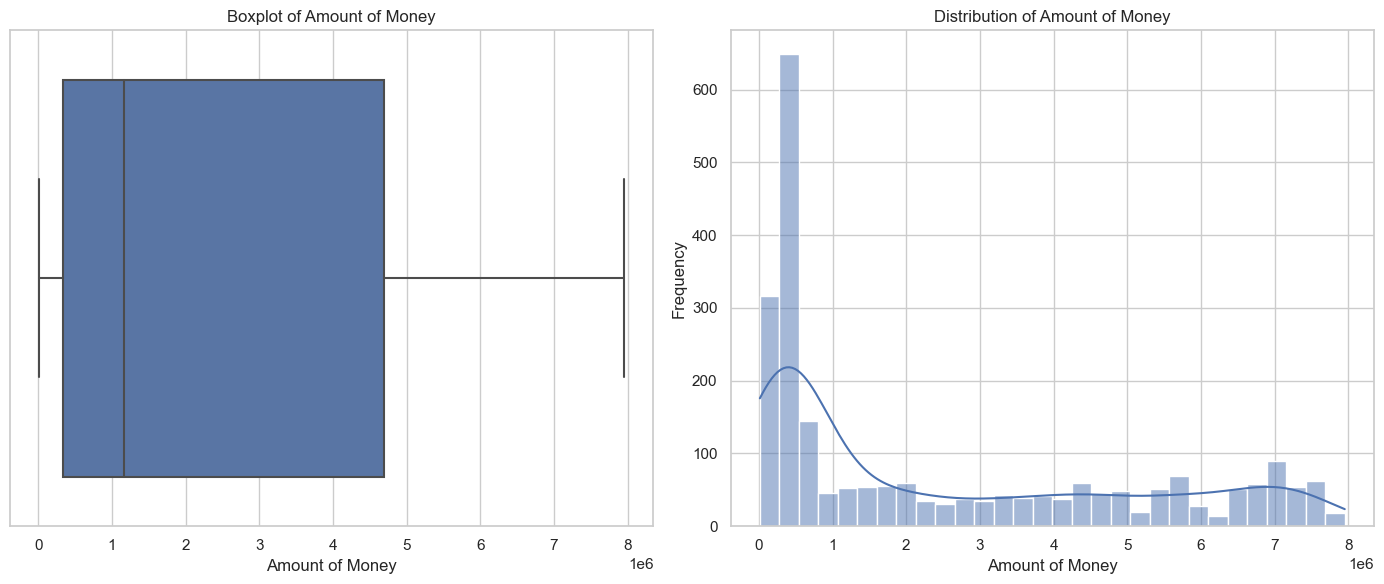

Transactions with Unusually High or Low Amount of Money:
Empty DataFrame
Columns: [amountofmoney, typeofaction, sourceid, destinationid, date]
Index: []


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn style
sns.set(style="whitegrid")

# Plot a boxplot to identify outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['amountofmoney'])
plt.title('Boxplot of Amount of Money')
plt.xlabel('Amount of Money')

# Plot a histogram for better distribution visualization
plt.subplot(1, 2, 2)
sns.histplot(df['amountofmoney'], bins=30, kde=True)
plt.title('Distribution of Amount of Money')
plt.xlabel('Amount of Money')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Calculate z-scores to identify outliers
z_scores = (df['amountofmoney'] - df['amountofmoney'].mean()) / df['amountofmoney'].std()

# Define a threshold for z-scores (e.g., 3 standard deviations)
z_threshold = 3

# Identify transactions with unusually high or low values
outliers = df[(z_scores > z_threshold) | (z_scores < -z_threshold)]

# Display information about identified outliers
print("Transactions with Unusually High or Low Amount of Money:")
print(outliers[['amountofmoney', 'typeofaction', 'sourceid', 'destinationid', 'date']])



In [17]:
# Find the transaction amount with the highest frequency
most_frequent_amount = df['amountofmoney'].value_counts().idxmax()

# Find the count of the most frequent amount
frequency_of_most_frequent_amount = df['amountofmoney'].value_counts().max()

print(f"The transaction amount with the highest frequency is {most_frequent_amount} with a count of {frequency_of_most_frequent_amount}.")


The transaction amount with the highest frequency is 274171 with a count of 27.


In [19]:
# Separate data into fraudulent and non-fraudulent transactions
fraudulent_transactions = df[df['isfraud'] == 1]
non_fraudulent_transactions = df[df['isfraud'] == 0]

# Summary statistics for fraudulent transactions
fraudulent_stats = fraudulent_transactions['amountofmoney'].describe().round(0)
print("Summary Statistics for Fraudulent Transactions:")
print(fraudulent_stats)
print()

# Summary statistics for non-fraudulent transactions
non_fraudulent_stats = non_fraudulent_transactions['amountofmoney'].describe().round(0)
print("Summary Statistics for Non-Fraudulent Transactions:")
print(non_fraudulent_stats)



Summary Statistics for Fraudulent Transactions:
count       1399.0
mean     2493973.0
std      2975641.0
min       215499.0
25%       322413.0
50%       445249.0
75%      5820894.0
max      7952497.0
Name: amountofmoney, dtype: float64

Summary Statistics for Non-Fraudulent Transactions:
count        941.0
mean     2530304.0
std      1772970.0
min        13332.0
25%       993567.0
50%      2348784.0
75%      4022893.0
max      6878958.0
Name: amountofmoney, dtype: float64


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges from sourceid to destinationid with transaction frequencies as weights
edges = df.groupby(['sourceid', 'destinationid']).size().reset_index(name='transaction_count')
for _, row in edges.iterrows():
    G.add_edge(row['sourceid'], row['destinationid'], weight=row['transaction_count'])

# Calculate node sizes based on transaction frequencies
node_sizes = [G.out_degree(node, weight='weight') * 10 for node in G.nodes]

# Create a new figure for the graph
plt.figure(figsize=(12, 8))

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=8, font_color='black', edge_color='gray', cmap=plt.cm.Blues, alpha=0.7)
plt.title('Network Structure of Transactions (SourceID to DestinationID)')
plt.show()



TypeError: '_AxesStack' object is not callable

<Figure size 1200x800 with 0 Axes>

In [22]:
pip install python-louvain


                                              0.0/204.6 kB ? eta -:--:--
     ------------------------------------   194.6/204.6 kB 5.8 MB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=df95dba799fabe35795237e005f16be9a4b474a3010d5130748dae6626062e71
  Stored in directory: c:\users\a\appdata\local\pip\cache\wheels\11\c1\e7\f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


C:\Users\A\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
C:\Users\A\AppData\Local\Temp\ipykernel_12052\3643678167.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.get_cmap('viridis'), node_size=node_sizes)


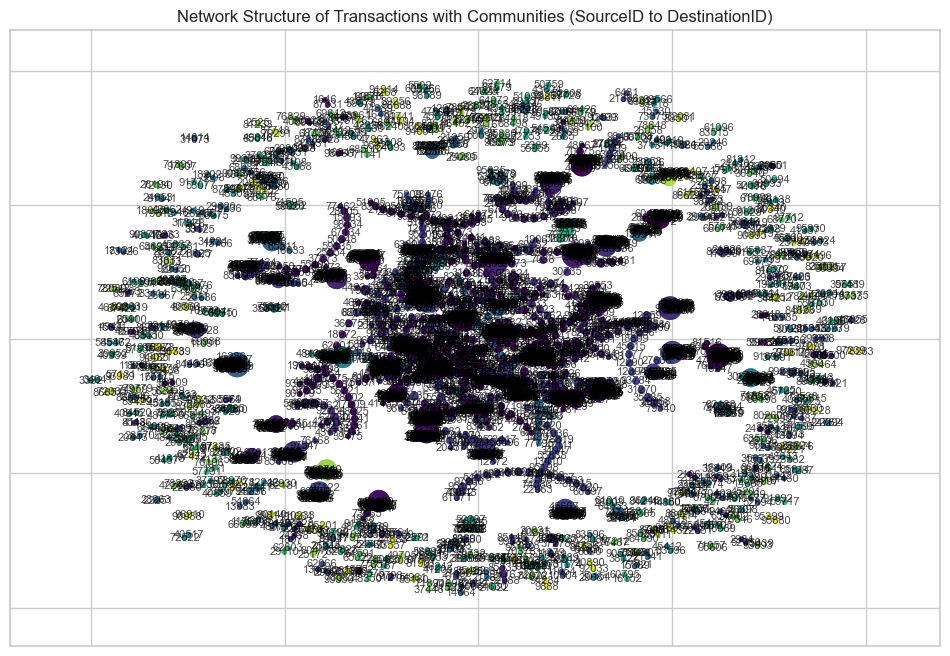

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import community  # Install using: pip install python-louvain

# Create an undirected graph
G = nx.Graph()

# Add edges from sourceid to destinationid with transaction frequencies as weights
edges = df.groupby(['sourceid', 'destinationid']).size().reset_index(name='transaction_count')
for _, row in edges.iterrows():
    G.add_edge(row['sourceid'], row['destinationid'], weight=row['transaction_count'])

# Calculate node sizes based on transaction frequencies
node_sizes = [G.degree(node, weight='weight') * 10 for node in G.nodes]

# Apply Louvain community detection algorithm
partition = community.best_partition(G)

# Create a new figure for the graph
plt.figure(figsize=(12, 8))

# Draw the graph with communities using nx.draw_networkx
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=node_sizes, font_size=8, font_color='black', edge_color='gray', cmap=plt.cm.Blues, alpha=0.7)

# Highlight communities with different colors
colors = [partition[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.get_cmap('viridis'), node_size=node_sizes)

plt.title('Network Structure of Transactions with Communities (SourceID to DestinationID)')
plt.show()




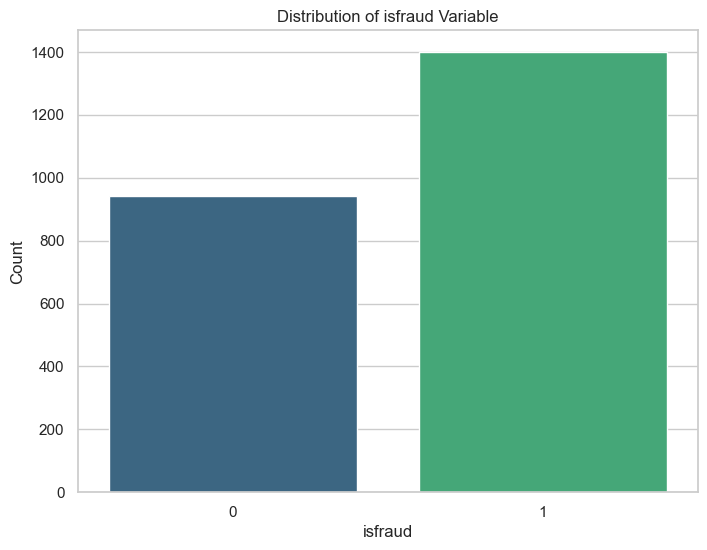

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'isfraud' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='isfraud', data=df, palette='viridis')
plt.title('Distribution of isfraud Variable')
plt.xlabel('isfraud')
plt.ylabel('Count')
plt.show()


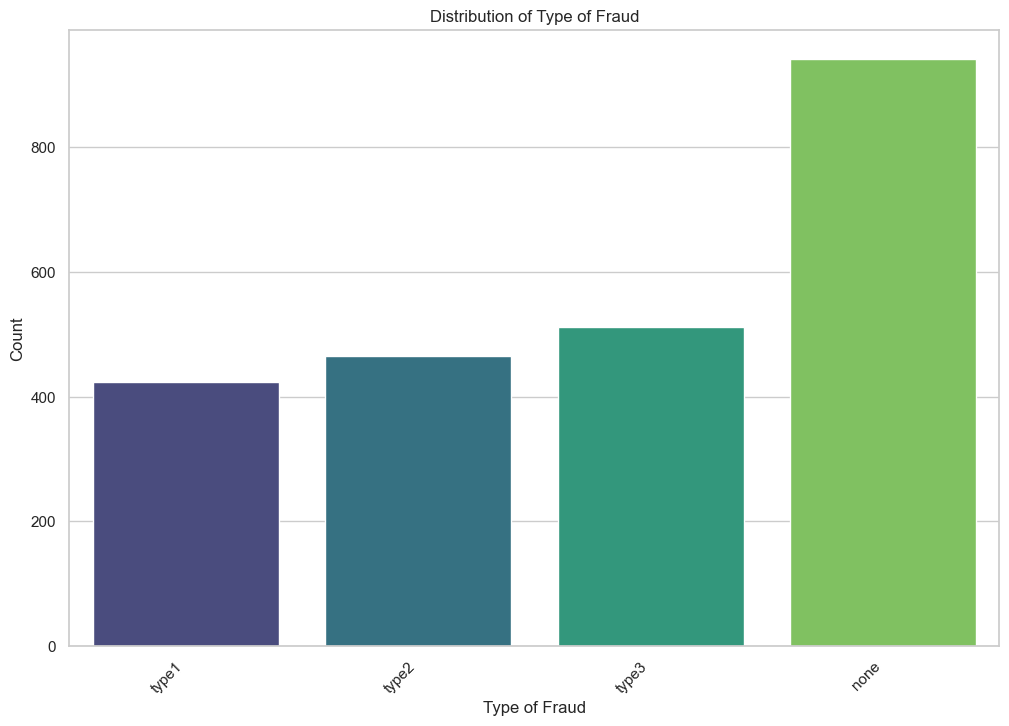

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'typeoffraud' variable
plt.figure(figsize=(12, 8))
sns.countplot(x='typeoffraud', data=df, palette='viridis')
plt.title('Distribution of Type of Fraud')
plt.xlabel('Type of Fraud')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


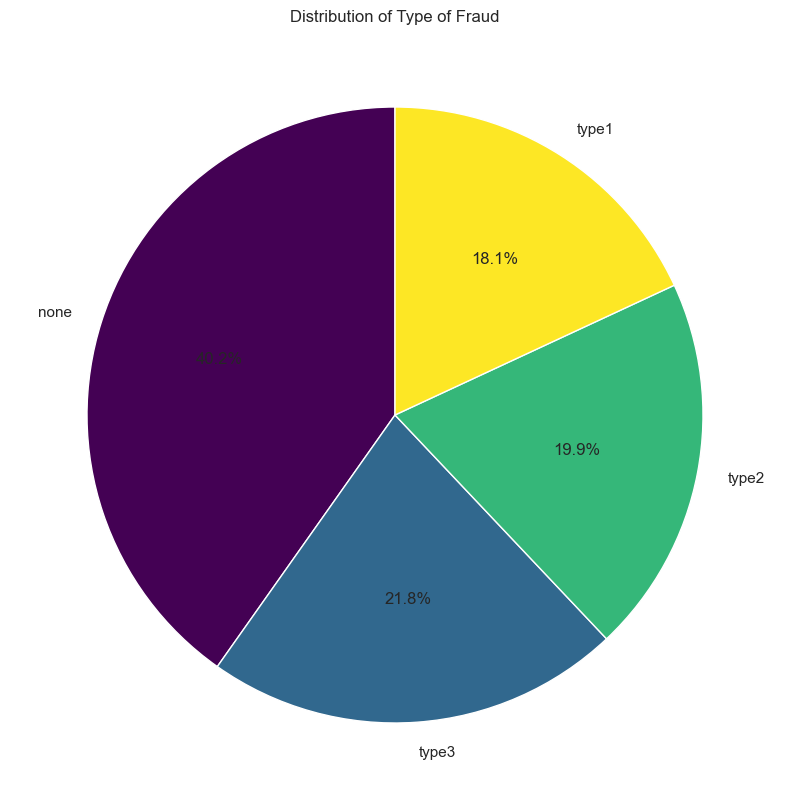

In [28]:
# Plot a pie chart for the distribution of the 'typeoffraud' variable
plt.figure(figsize=(10, 10))
df['typeoffraud'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Distribution of Type of Fraud')
plt.ylabel('')  # Remove y-axis label
plt.show()


C:\Users\A\AppData\Local\Temp\ipykernel_12052\3281130704.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


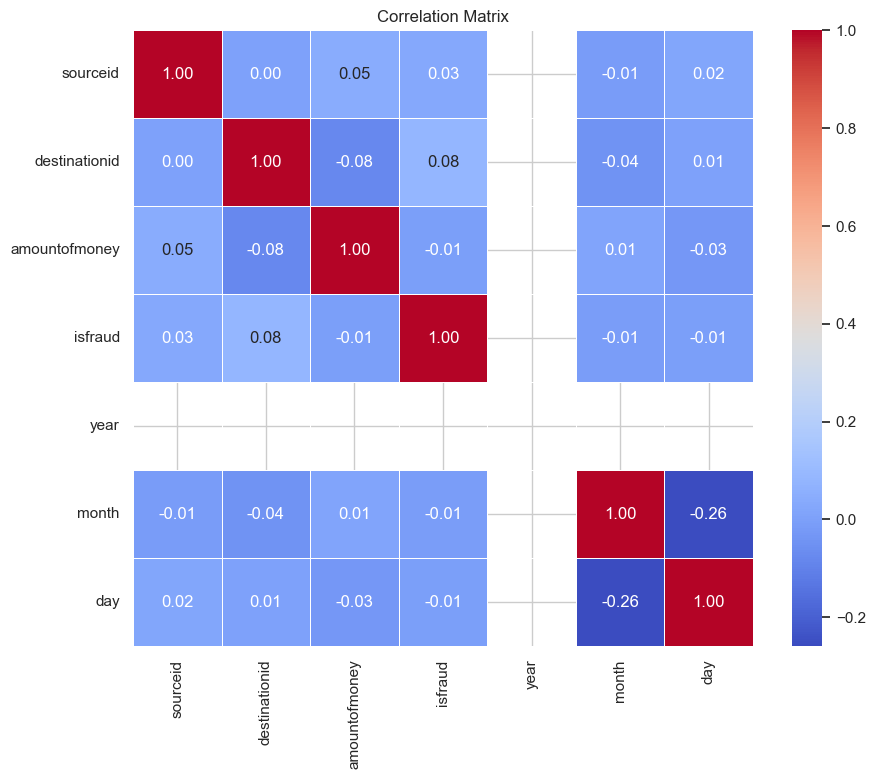

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [30]:
# Extract correlations with the 'isfraud' variable
fraud_correlations = correlation_matrix['isfraud'].sort_values(ascending=False)

# Display correlations related to fraud
print("Correlations with 'isfraud':")
print(fraud_correlations)


Correlations with 'isfraud':
isfraud          1.000000
destinationid    0.084050
sourceid         0.027593
day             -0.005343
amountofmoney   -0.006959
month           -0.009017
year                  NaN
Name: isfraud, dtype: float64
